In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
import pickle
from configs.RecursiveVPSDE.LSTM_8DLorenz.recursive_LSTM_PostMeanScore_8DLorenz_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.LSTM_8DLorenz.recursive_LSTM_PostMeanScore_8DLorenz_10FC_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.LSTM_8DLorenz.recursive_LSTM_PostMeanScore_8DLorenz_125FC_T256_H05_tl_110data_StbleTgt import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
num_paths = 11052
config = get_config()

In [8]:
def get_drift_files(config):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_dir = project_config.ROOT_DIR + f"experiments/results/"
    true_files = []
    local_files = []
    for file in os.listdir(root_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_dir+file)
            elif "local" in file:
                local_files.append(root_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [9]:
config = get_config()
true_files, local_files, bws = get_drift_files(config=config)
local_files

['/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f8DLnz_DriftTrack_00001bw_11052NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f8DLnz_DriftTrack_0000126bw_11052NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f8DLnz_DriftTrack_0000159bw_11052NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f8DLnz_DriftTrack_0000201bw_11052NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f8DLnz_DriftTrack_0000254bw_11052NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f8DLnz_DriftTrack_0000321bw_11052NPaths_00t0_3906e-03dT_075FConst_l

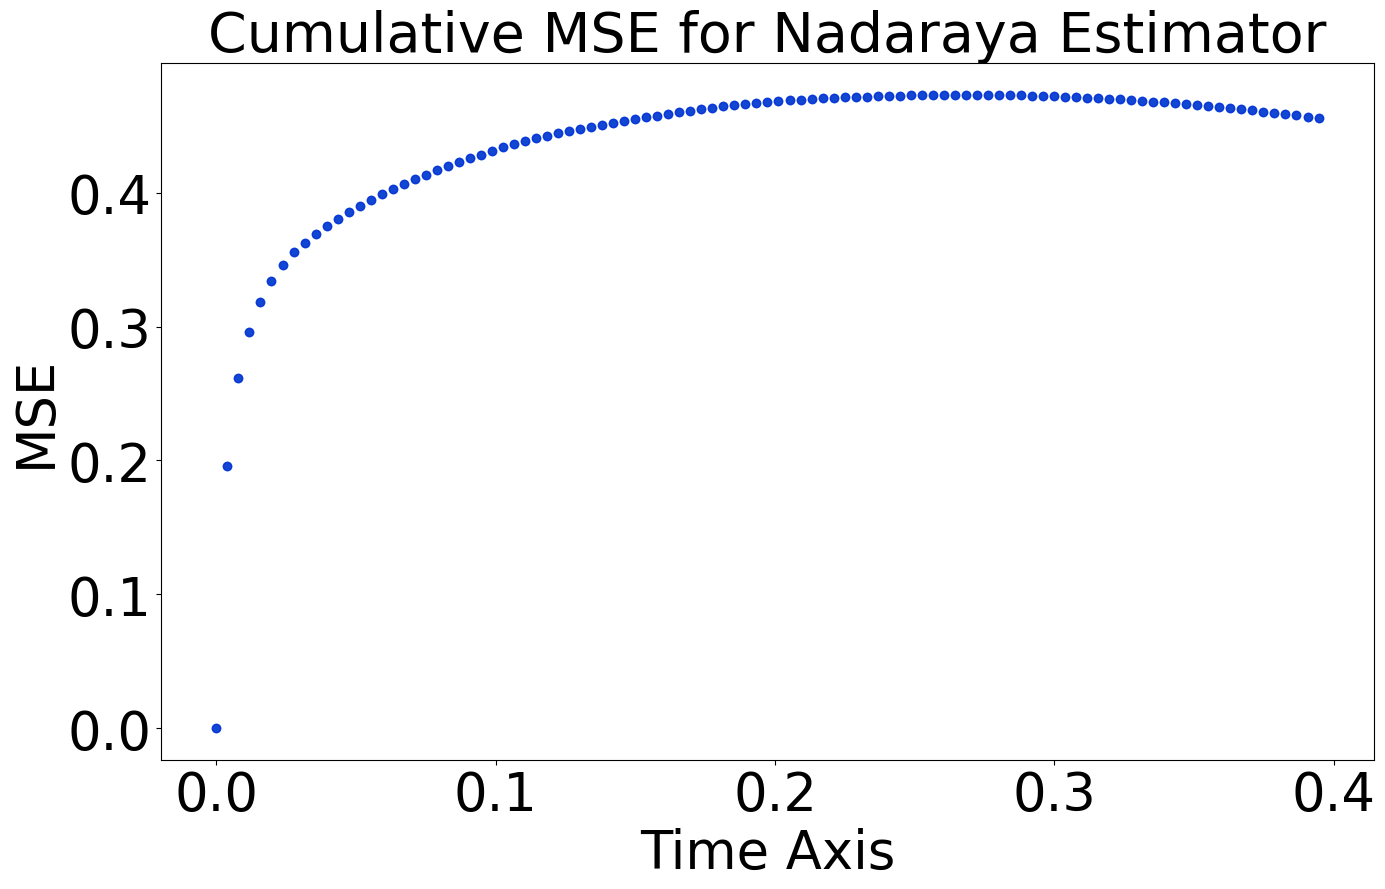

Final time cumulative MSE local-time error 0.4558883936895988 with IQR ((0.4558883936895989, 0.4558883936895989))at bw 1e-05 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (1e-05, 0, 0.4558883936895988, 0.0, 0.4558883936895988)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (1.26e-05, 1, 0.4558883936895988, 0.0, 0.4558883936895988)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (1.59e-05, 2, 0.4558883936895988, 0.0, 0.4558883936895988)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (2.01e-05, 3, 0.4558883936895988, 0.0, 0.4558883936895988)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (2.54e-05, 4, 0.4558883936895988, 0.0, 0.4558883936895988)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (3.21e-05, 5, 0.4558883936895988, 0.0, 0.4558883936895988)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (4.05e-05, 6, 0.4558883936895988, 0.0, 0.4558883936895988)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (5.12e-05, 7, 0.4558883936895988, 0.0, 0.455888393

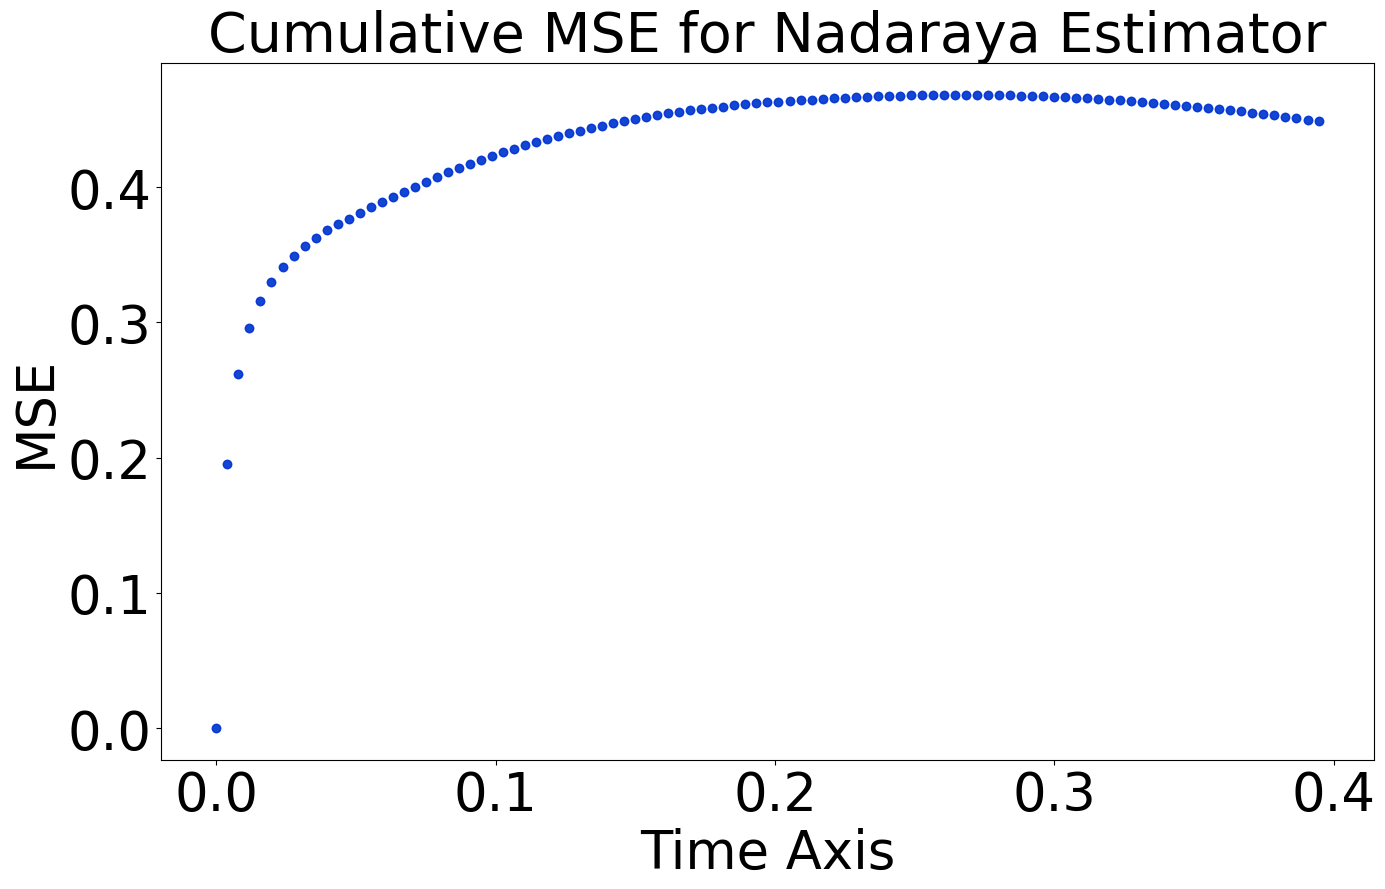

Final time cumulative MSE local-time error 0.4485859210752346 with IQR ((0.4485859210752346, 0.4485859210752346))at bw 0.0001 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0001, 10, 0.4485859210752346, 0.0, 0.4485859210752346)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.000103, 11, 0.4558883936895988, 0.0, 0.4485859210752346)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0001119, 12, 0.4485859210752346, 0.0, 0.4485859210752346)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0001252, 13, 0.4485859210752346, 0.0, 0.4485859210752346)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.00013, 14, 0.4558883936895988, 0.0, 0.4485859210752346)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.00014, 15, 0.4485859210752346, 0.0, 0.4485859210752346)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0001566, 16, 0.4485859210752346, 0.0, 0.4485859210752346)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0001642, 17, 0.4558883936895988, 0.0,

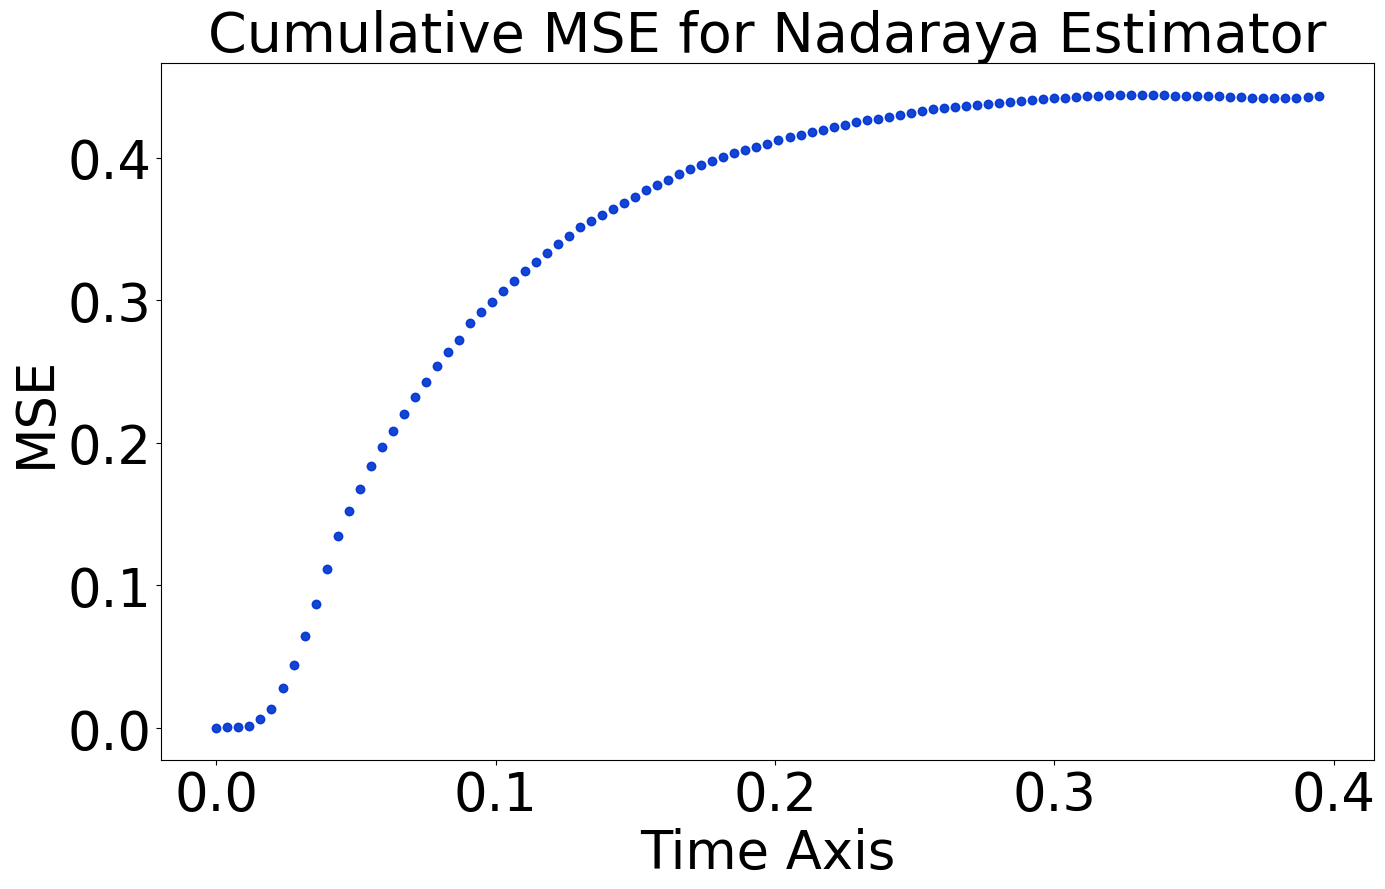

Final time cumulative MSE local-time error 0.44306082415793735 with IQR ((0.4430608241579374, 0.4430608241579374))at bw 0.0026963 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0026963, 29, 0.44306082415793735, 0.0, 0.44306082415793735)



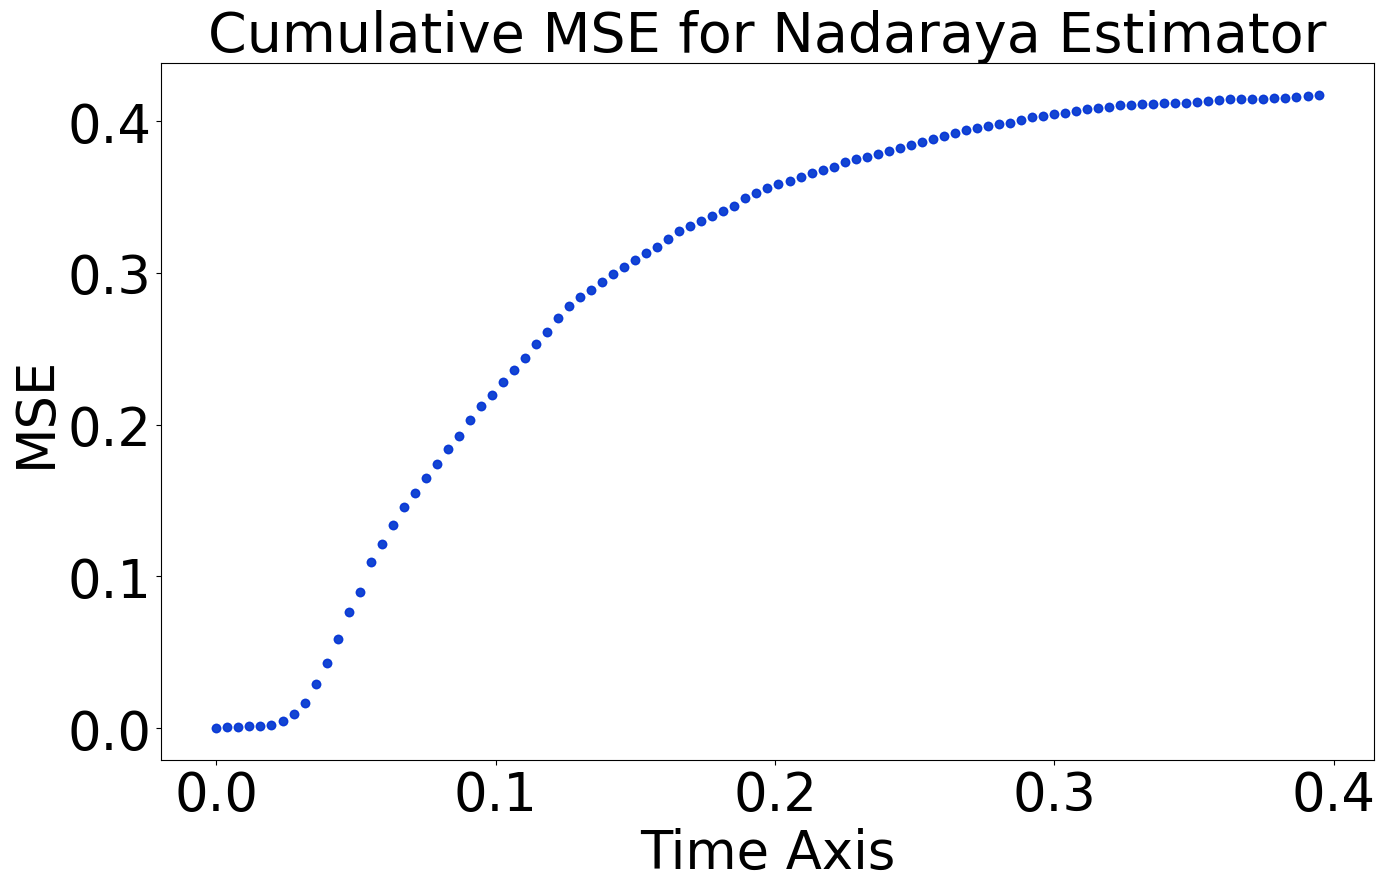

Final time cumulative MSE local-time error 0.41738785271844564 with IQR ((0.41738785271844553, 0.41738785271844553))at bw 0.0034045 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0034045, 30, 0.41738785271844564, 0.0, 0.41738785271844564)



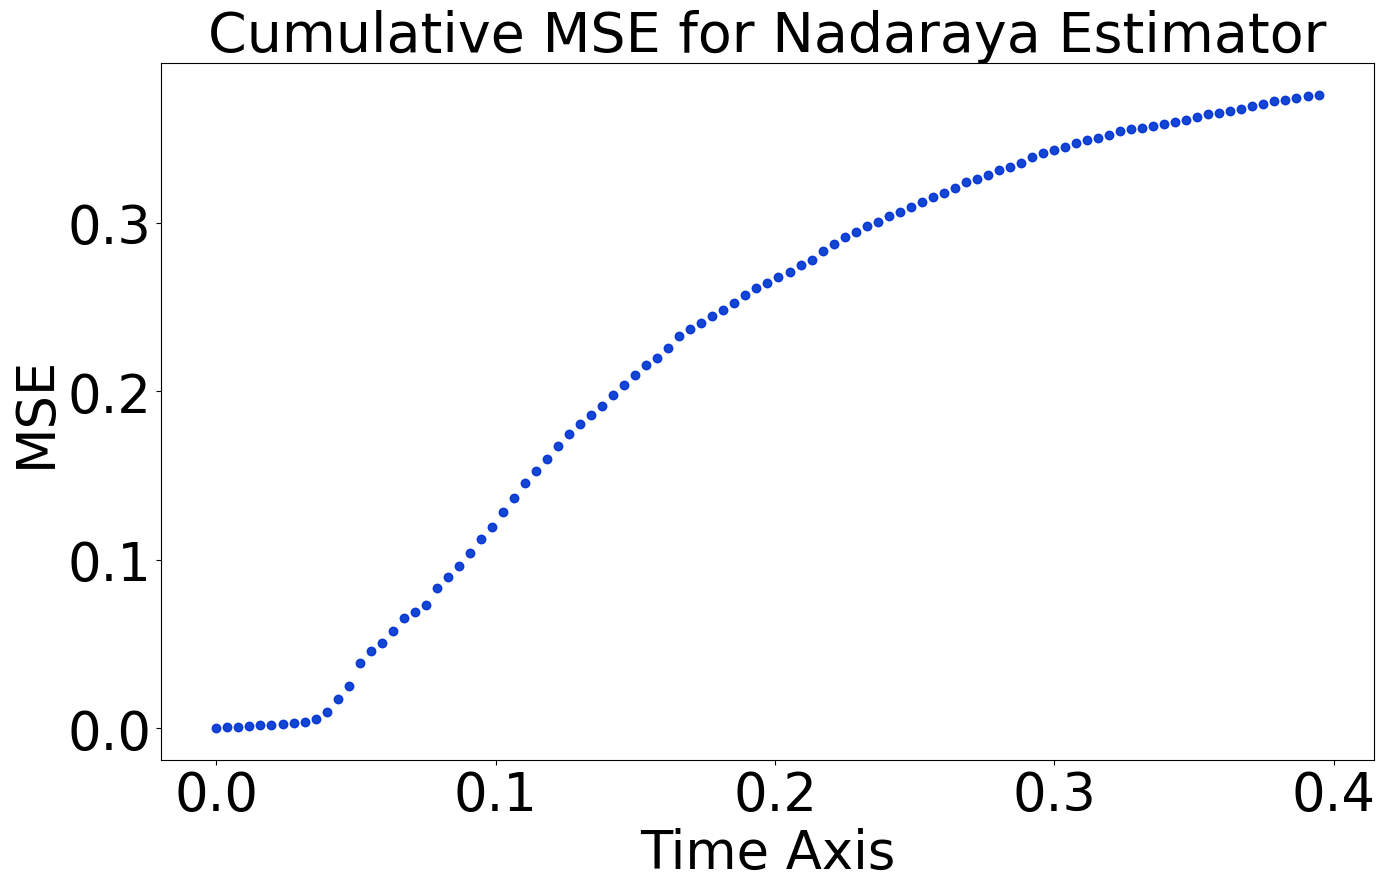

Final time cumulative MSE local-time error 0.3760669298784586 with IQR ((0.3760669298784587, 0.3760669298784587))at bw 0.0042987 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0042987, 31, 0.3760669298784586, 0.0, 0.3760669298784586)



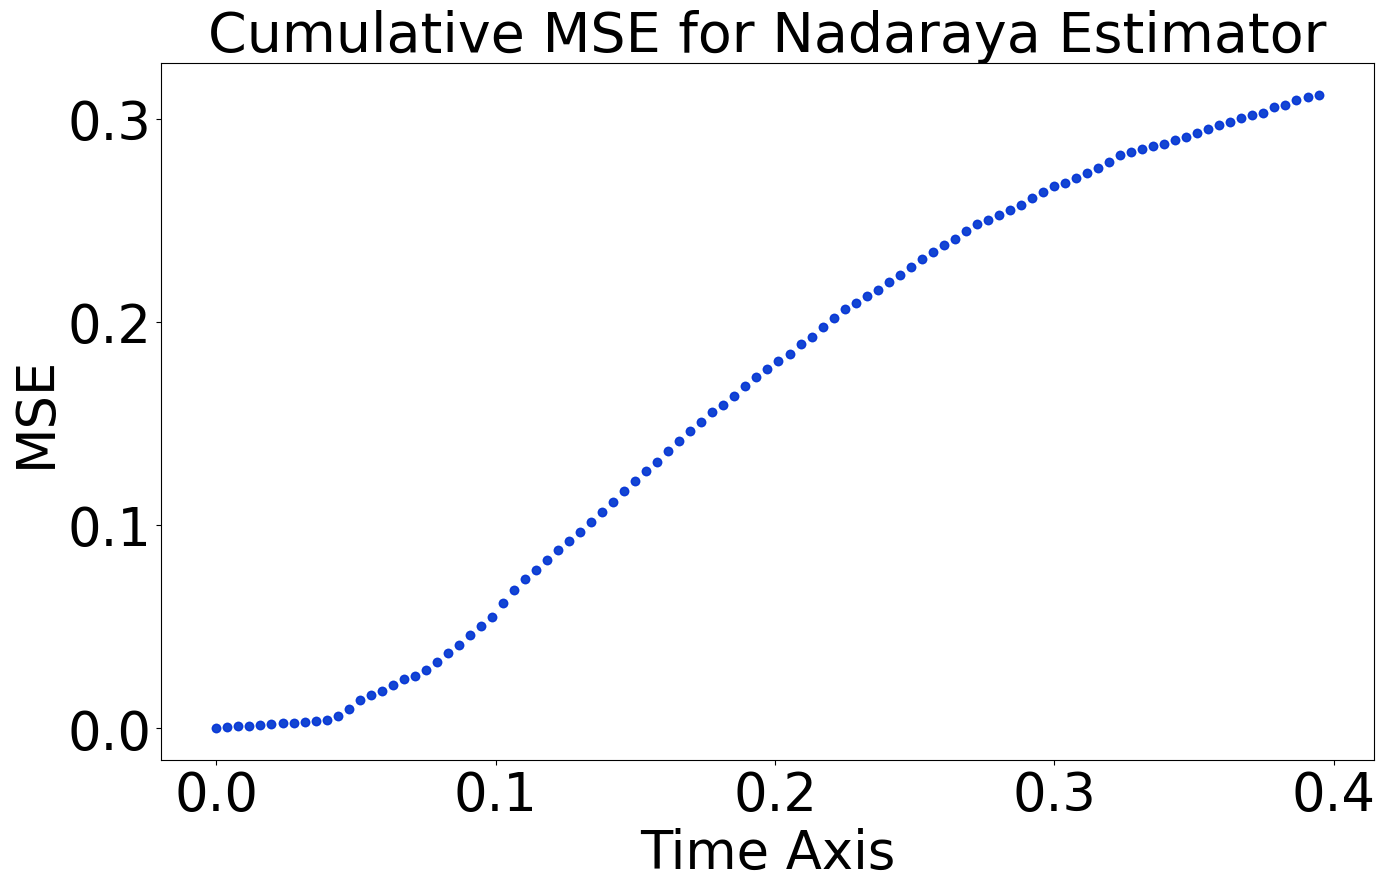

Final time cumulative MSE local-time error 0.31183276529659393 with IQR ((0.31183276529659393, 0.31183276529659393))at bw 0.0054277 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0054277, 32, 0.31183276529659393, 0.0, 0.31183276529659393)



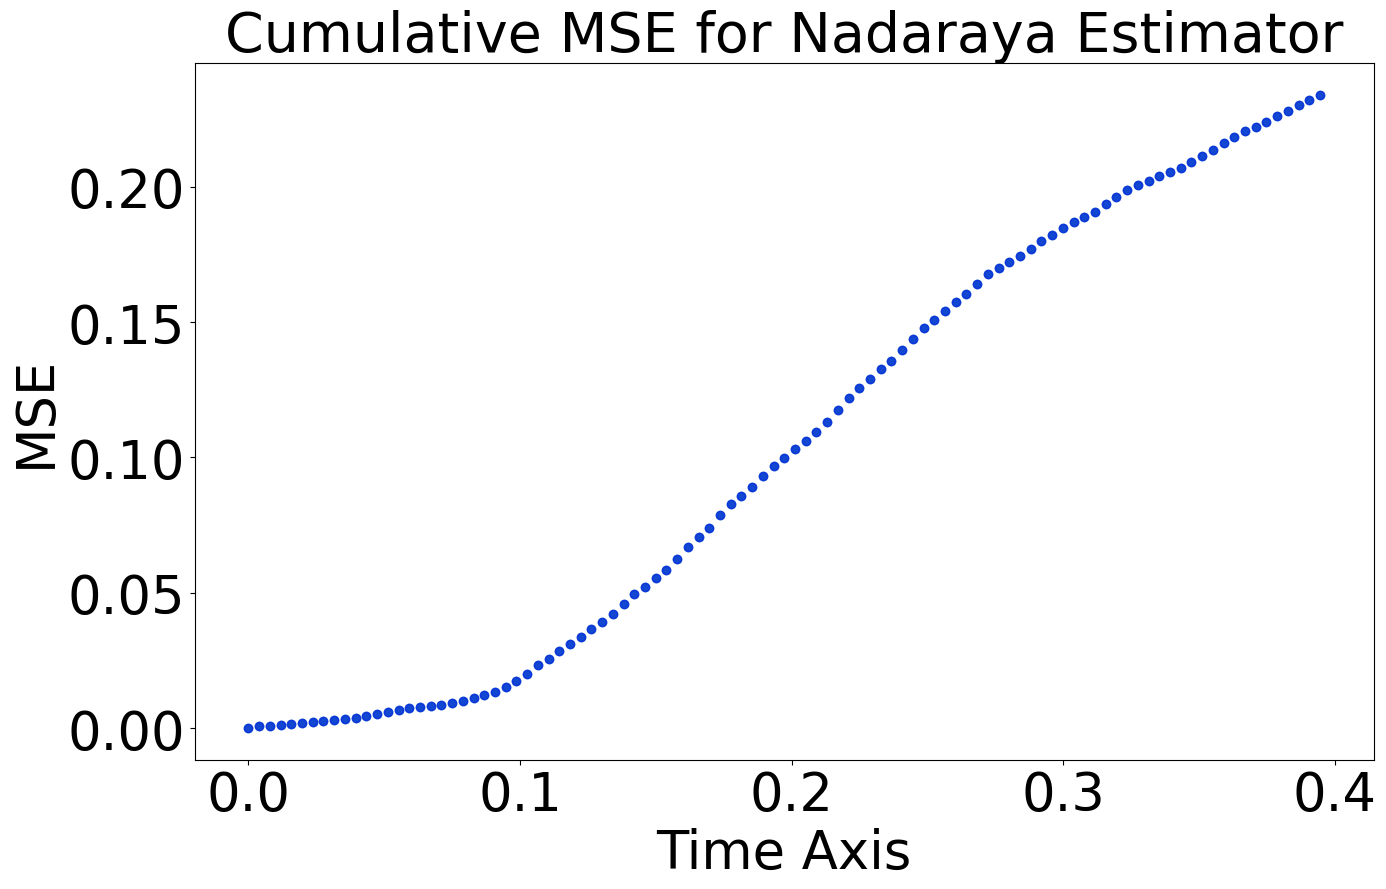

Final time cumulative MSE local-time error 0.23401100890308565 with IQR ((0.23401100890308563, 0.23401100890308563))at bw 0.0068533 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0068533, 33, 0.23401100890308565, 0.0, 0.23401100890308565)



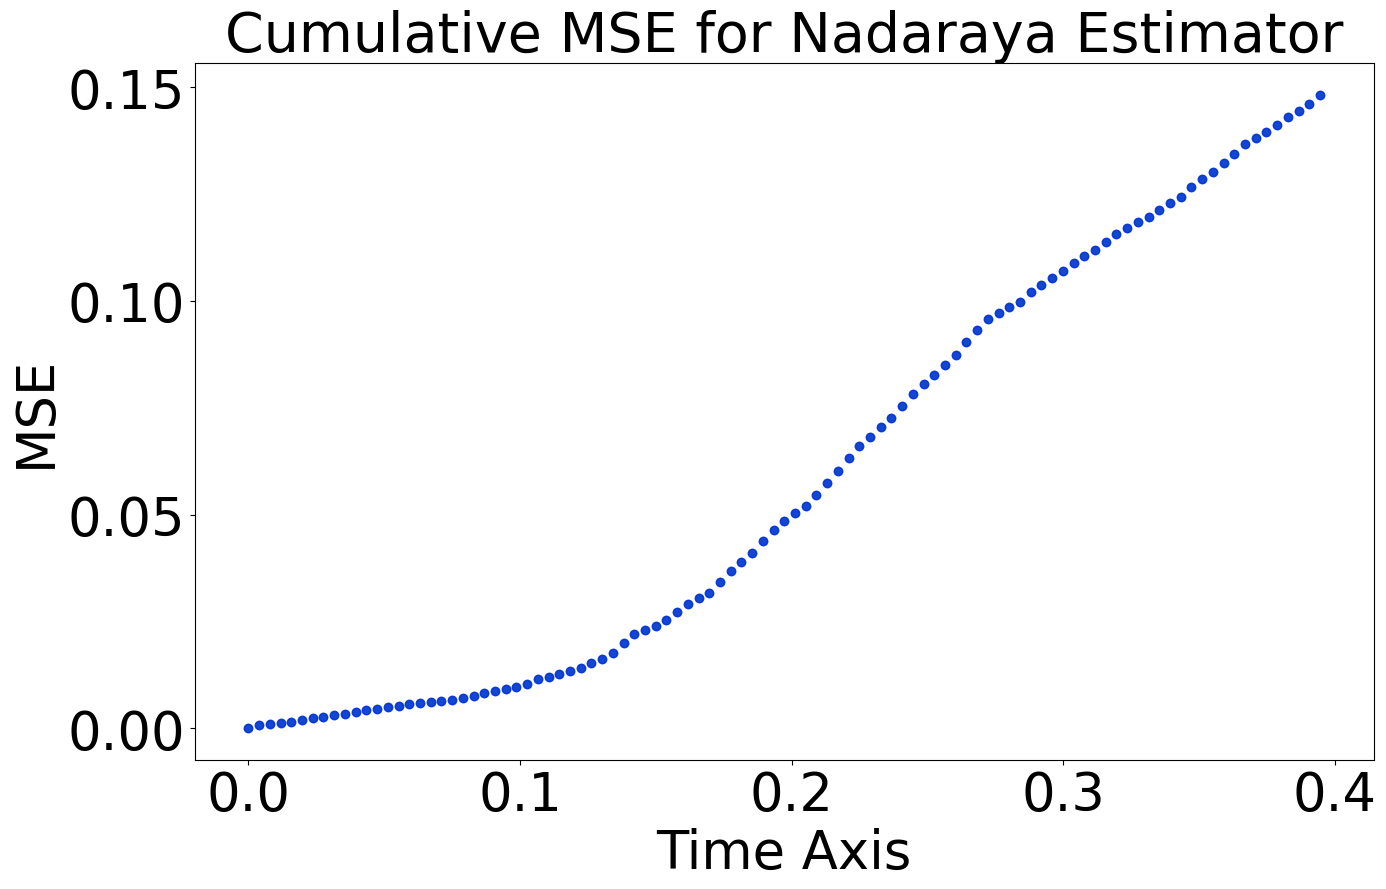

Final time cumulative MSE local-time error 0.1483069257014464 with IQR ((0.14830692570144638, 0.14830692570144638))at bw 0.0086533 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0086533, 34, 0.1483069257014464, 0.0, 0.1483069257014464)



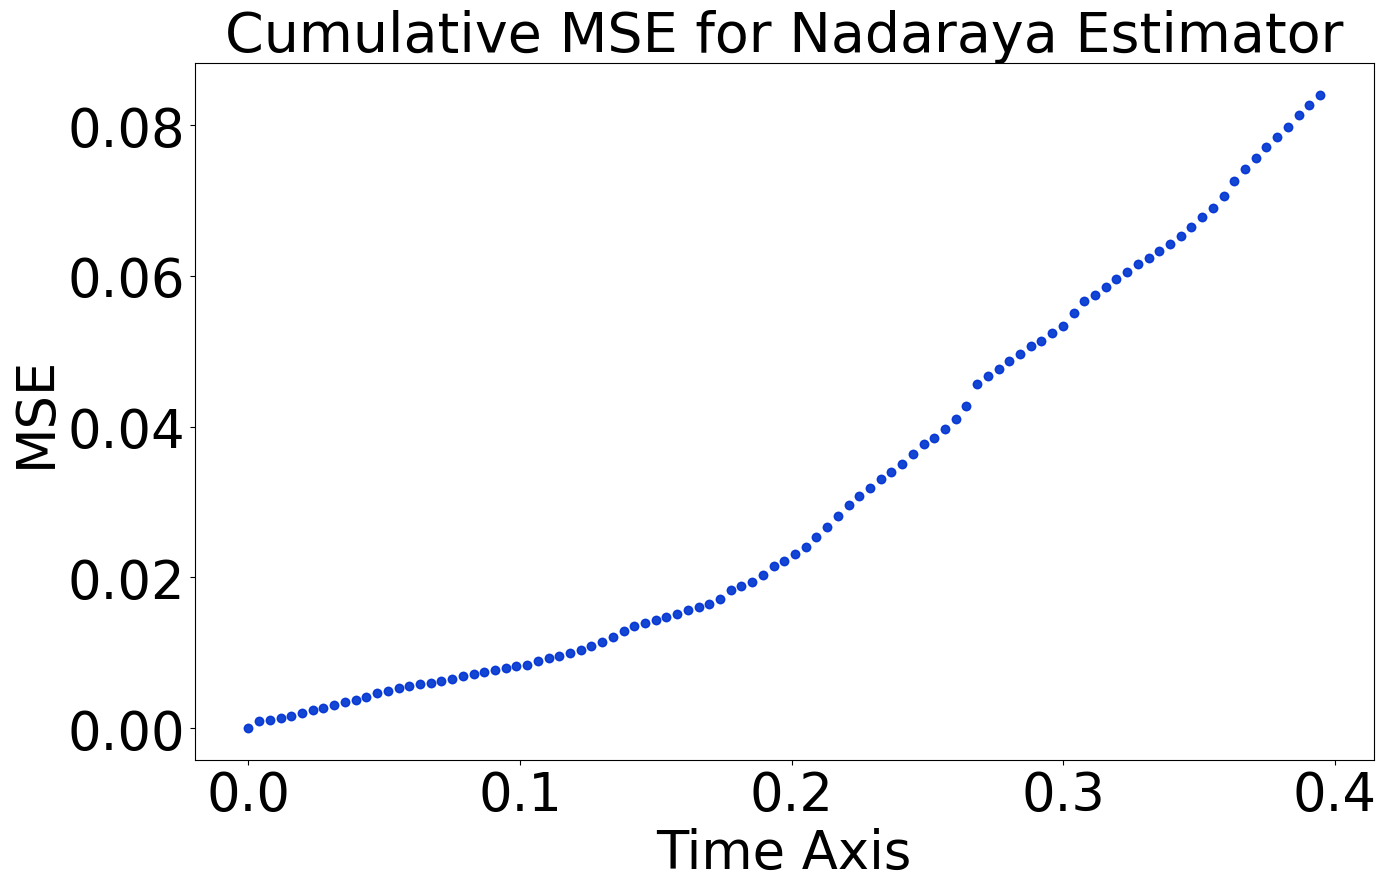

Final time cumulative MSE local-time error 0.08403711639753796 with IQR ((0.08403711639753796, 0.08403711639753796))at bw 0.010926 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.010926, 35, 0.08403711639753796, 0.0, 0.08403711639753796)



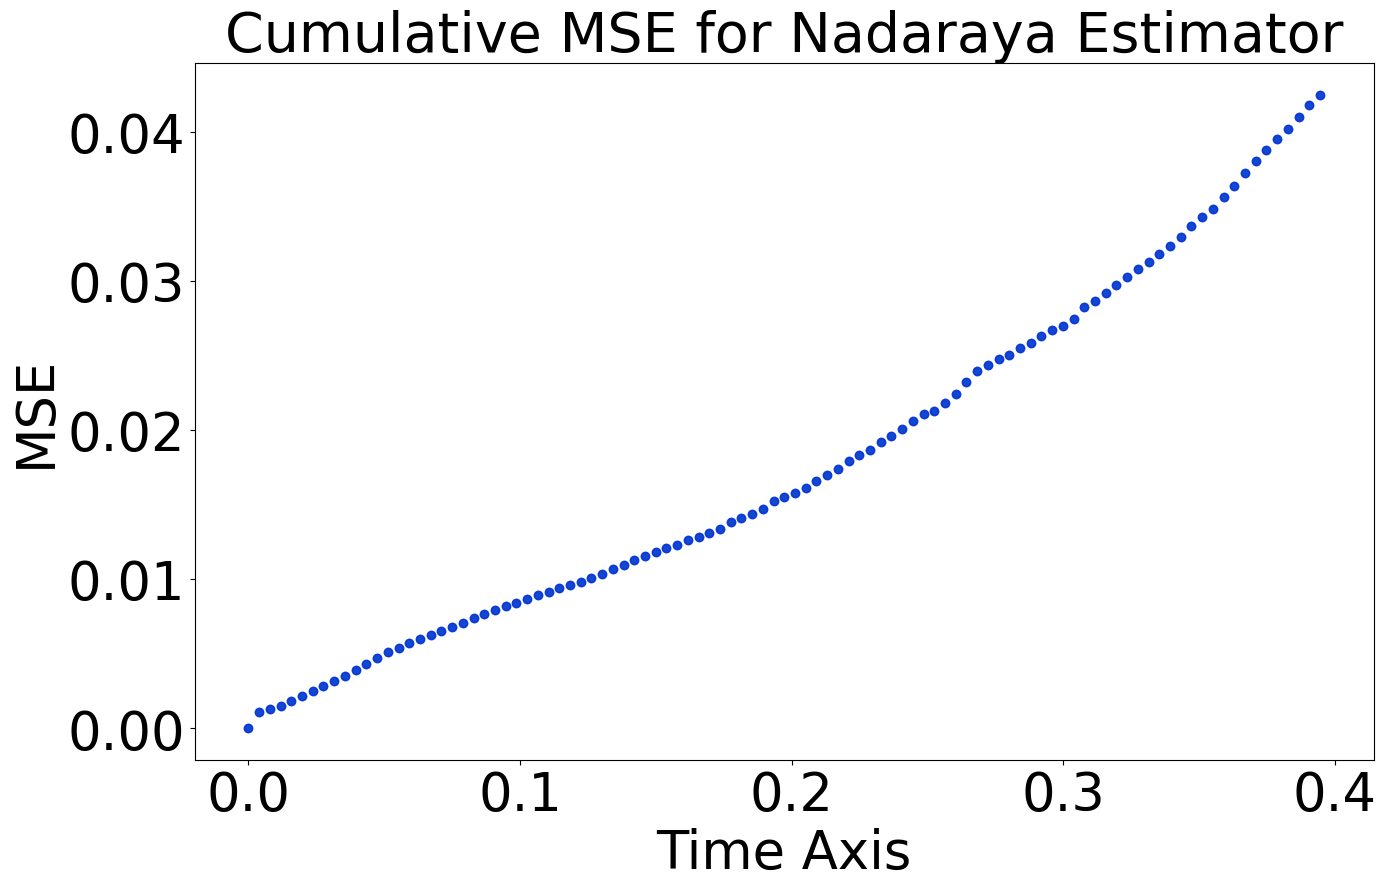

Final time cumulative MSE local-time error 0.04249304411107923 with IQR ((0.04249304411107923, 0.04249304411107923))at bw 0.0137957 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0137957, 36, 0.04249304411107923, 0.0, 0.04249304411107923)



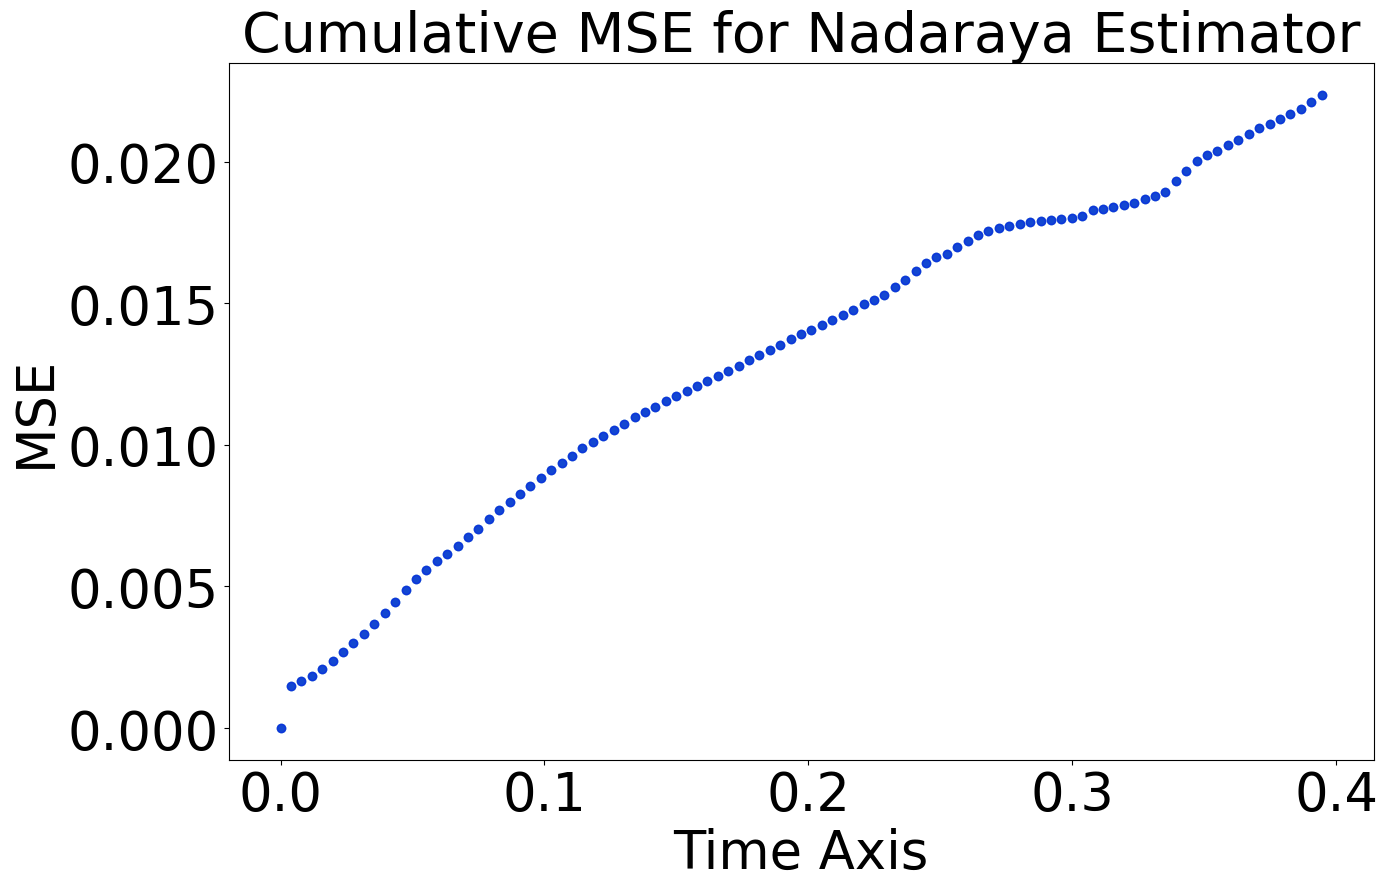

Final time cumulative MSE local-time error 0.02237157829846548 with IQR ((0.022371578298465488, 0.022371578298465488))at bw 0.0174191 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0174191, 37, 0.02237157829846548, 0.0, 0.02237157829846548)



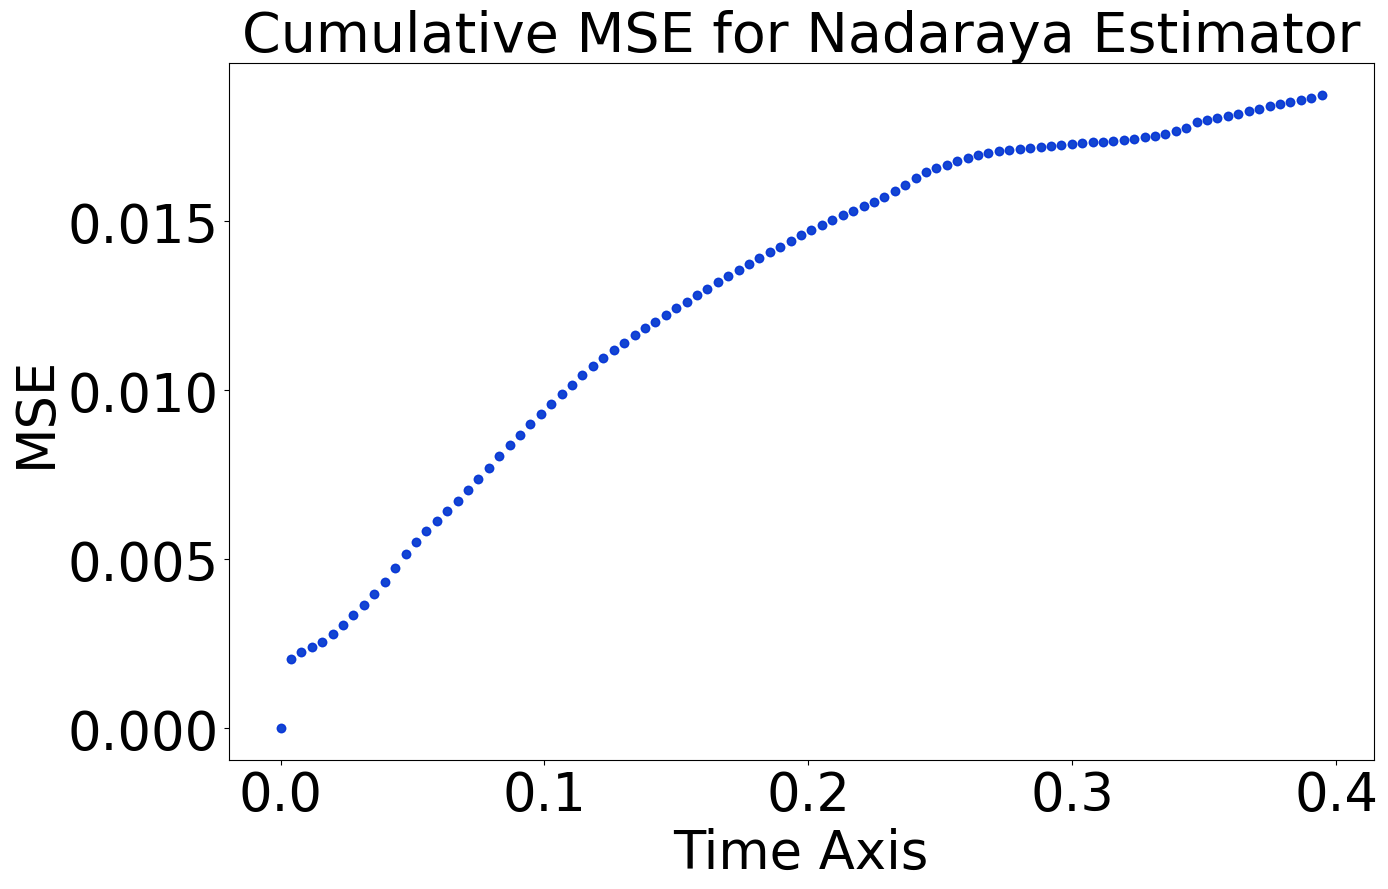

Final time cumulative MSE local-time error 0.018749653349794414 with IQR ((0.01874965334979442, 0.01874965334979442))at bw 0.0219942 for 0.75FConst

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0219942, 38, 0.018749653349794414, 0.0, 0.018749653349794414)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0277709, 39, 0.018993430005635966, 0.0, 0.018749653349794414)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0350648, 40, 0.020125154992801323, 0.0, 0.018749653349794414)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0442745, 41, 0.021629346568600445, 0.0, 0.018749653349794414)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0559031, 42, 0.023751403910422585, 0.0, 0.018749653349794414)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0705859, 43, 0.026251016698431728, 0.0, 0.018749653349794414)

Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE (0.0891251, 44, 0.029478348737678815, 0.0, 0.018749653349794414)



In [18]:
curr_rmse = np.inf
toSave = False
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])/np.sqrt(config.deltaT)
    all_local_states = np.load(file[1])/np.sqrt(config.deltaT)
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        all_local_errors = np.cumsum(np.mean(np.power(all_true_states- all_local_states,2), axis=(1,3)), axis=-1)/np.arange(1, all_local_states.shape[2]+1)
        total_local_errors = np.mean((all_local_errors), axis=0)
        total_local_errors_minq = np.quantile((all_local_errors), axis=0,q=0.025)
        total_local_errors_maxq = np.quantile((all_local_errors), axis=0,q=0.975)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            miny = total_local_errors-total_local_errors_minq
            miny[miny < 0.] = 0.
            maxy = total_local_errors_maxq-total_local_errors
            maxy[maxy < 0.] = 0.
            time_steps = np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0])
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            ax.scatter(np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0]), total_local_errors)
            plt.errorbar(time_steps,total_local_errors,yerr=[miny, maxy],xerr=None, fmt='o', color="blue", alpha=0.4)
            ax.set_title(f"Cumulative MSE for Nadaraya Estimator",fontsize=40)
            ax.set_ylabel("MSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/IIDNadaraya_8DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 4)}_MinIQR_{round(total_local_errors_maxq[-1], 4)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")
        print(f"Bandwidth, BWIDX, Error Mean, Error IQR, CurrMSE {bw, np.argwhere(np.array(bws)==bw)[0,0], total_local_errors[-1], total_local_errors_maxq[-1]-total_local_errors_minq[-1], curr_rmse}\n")

In [19]:
good_idx = 38
bad_idx = 35
good_true = np.load(true_files[good_idx])[0, :, :, :]
good_local = np.load(local_files[good_idx])[0, :,:, :]
bad_true = np.load(true_files[bad_idx])[0, :, :, :]
bad_local = np.load(local_files[bad_idx])[0, :, :,:]
print(bad_local.shape, bad_true.shape)
B, T, D = bad_local.shape

(100, 101, 8) (100, 101, 8)


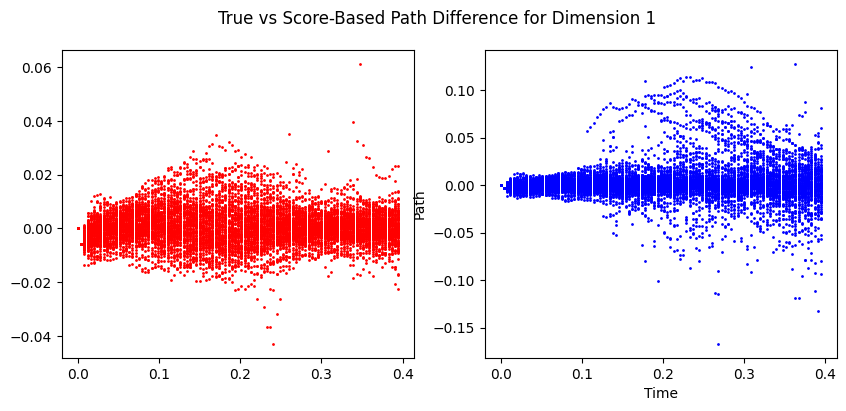

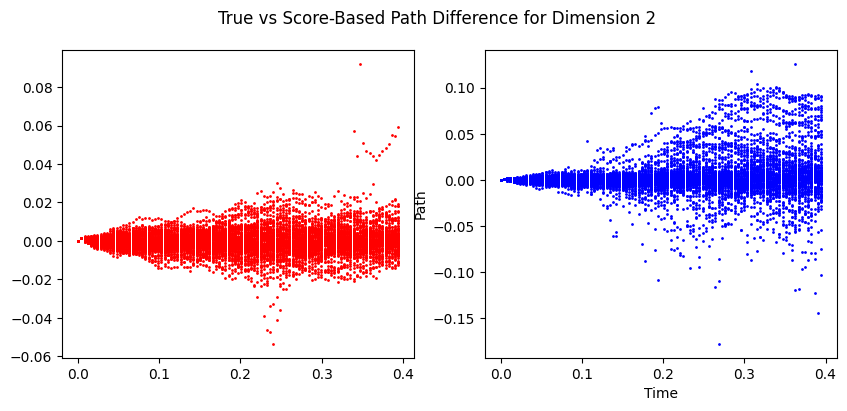

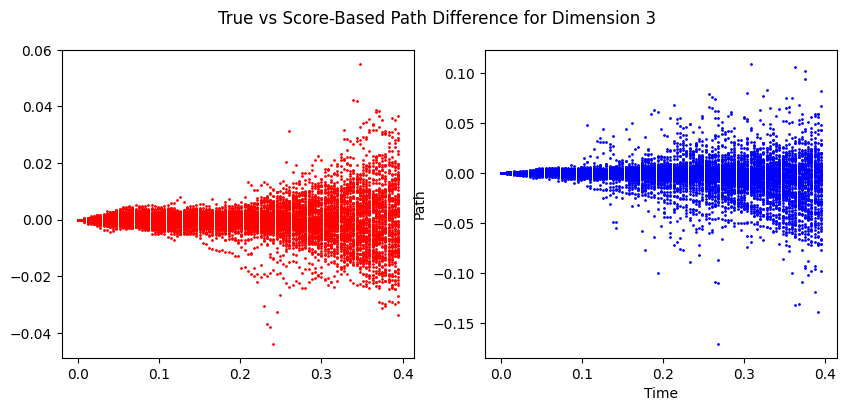

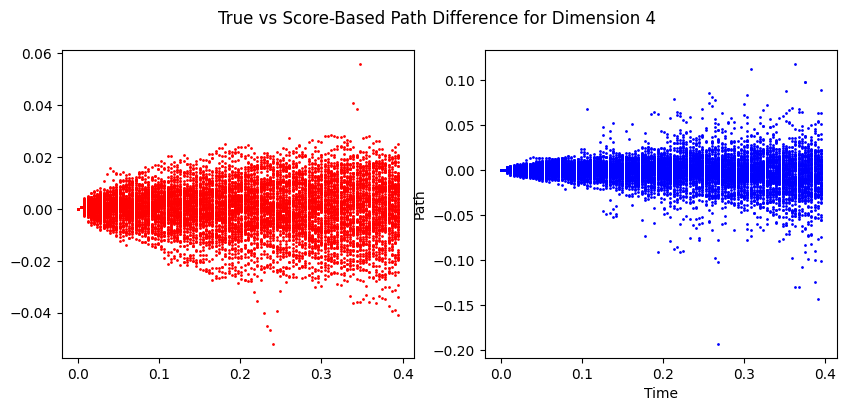

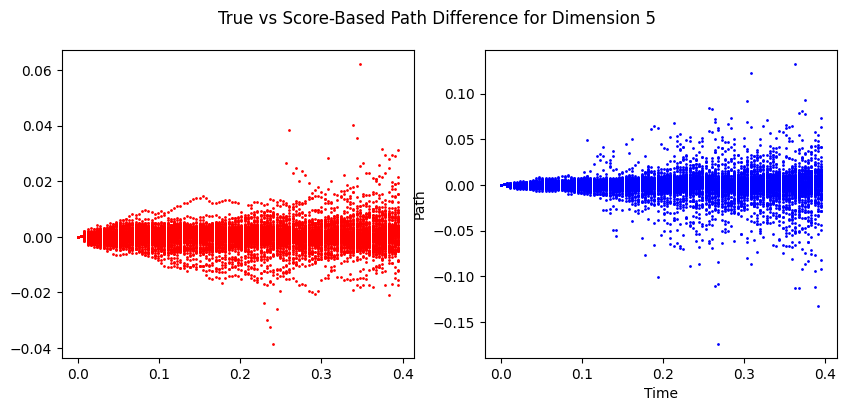

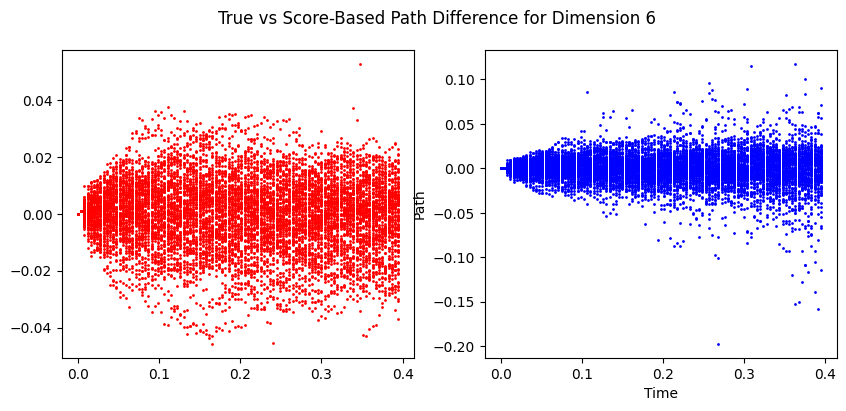

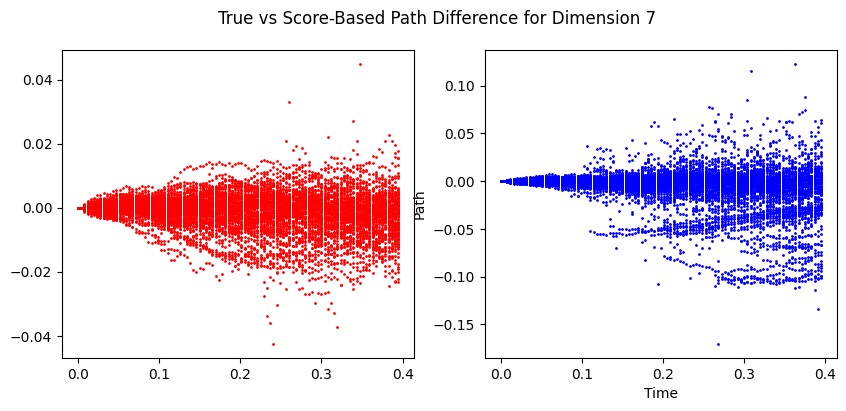

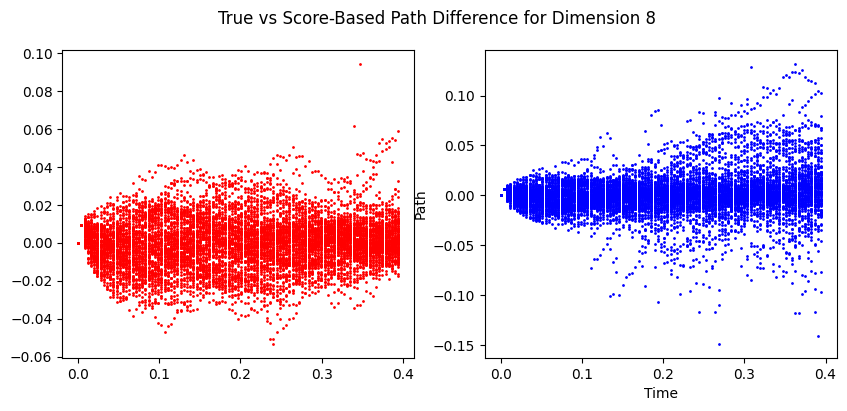

In [20]:
for dim in range(config.ndims):
    dim_idx = dim + 1
    time_ax = np.linspace(config.t0,config.deltaT*T,T)
    # Print different "true sample paths"
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    for _ in range(B):
        axes[0].scatter(time_ax, good_true[_, :, dim]-good_local[_, :, dim], color="red", s=1)
        axes[1].scatter(time_ax, bad_true[_, :, dim]-bad_local[_, :, dim], color="blue", s=1)
    plt.suptitle(f"True vs Score-Based Path Difference for Dimension {dim_idx}\n")
    plt.xlabel("Time")
    plt.ylabel("Path")
    plt.show()
    plt.close()